**Analyzing Chicago Taxi Rides & Weather Impact**

**Project**
In this project, we analyzed Chicago taxi data to find popular companies, top drop-off locations, and how weather affects ride times.



**Key Findings:**
Taxi Companies & Rides: A few companies handled most rides on November 15-16, 2017.
Top Drop-off Areas: The busiest neighborhoods were identified, likely key business or residential spots.
Weather & Ride Duration: A test showed that rides from the Loop to O’Hare took different times on rainy Saturdays.



**Conclusion:**
Chicago’s taxi market is dominated by a few companies, and some areas see more drop-offs. Rainy weather affects travel time, which is important for drivers and passengers.

In [2]:
import pandas as pd 
import scipy.stats as stats
import matplotlib.pyplot as plt


In [3]:
#Loading the data
df = pd.read_csv("/datasets/project_sql_result_01.csv")
df2= pd.read_csv("/datasets/project_sql_result_04.csv")
df3= pd.read_csv("/datasets/project_sql_result_07.csv")

In [4]:
#checking the data type 

df.info()
df2.info()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_se

In [5]:
#Checking the missing values 

missing_values_df= df.isna().sum()
print(missing_values_df)

missing_values_df2 = df2.isna().sum()
print(missing_values_df2)

missing_values_df3 = df3.isna().sum()
print(missing_values_df3)


company_name    0
trips_amount    0
dtype: int64
dropoff_location_name    0
average_trips            0
dtype: int64
start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64


In [6]:
#Trips Statistical Data 

df.describe()


,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [7]:
#Average Trips Statistical Data

df2.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [8]:
#Trips Duration on Different weather conditions Statistical Data 

df3.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


In [9]:
#checking for duplicateds 

dublicated_df = df.duplicated()
print(dublicated_df)

dublicated_df2 = df2.duplicated()
print(dublicated_df2)


dublicated_df3 = df3.duplicated()
print(dublicated_df3)




0     False
1     False
2     False
3     False
4     False
      ...  
59    False
60    False
61    False
62    False
63    False
Length: 64, dtype: bool
0     False
1     False
2     False
3     False
4     False
      ...  
89    False
90    False
91    False
92    False
93    False
Length: 94, dtype: bool
0       False
1       False
2       False
3       False
4       False
        ...  
1063    False
1064    False
1065     True
1066     True
1067    False
Length: 1068, dtype: bool


**Conclusion**

**The dataset reveals key insights into Chicago taxi rides:**


**Taxi Companies:** 64 companies show a wide trip count range (2 to 19,558), indicating uneven demand.



**Drop-off Locations:** 94 neighborhoods vary in trip volume, highlighting key business and residential areas.



**Ride Duration & Weather:** 1,068 rides from the Loop to O’Hare average ~35 minutes, with weather data available for further analysis.


**Data Quality:** No missing values, ensuring reliable insights.
Overall, the data is clean and useful for analyzing taxi demand, company performance, and ride duration factors.

In [10]:
#TOP 10 neighborhoods in terms of drop-offs

top_10_neighborhoods = (df2.groupby('dropoff_location_name')['average_trips']
                          .sum() 
                          .sort_values(ascending=False) 
                          .head(10)  
                       )

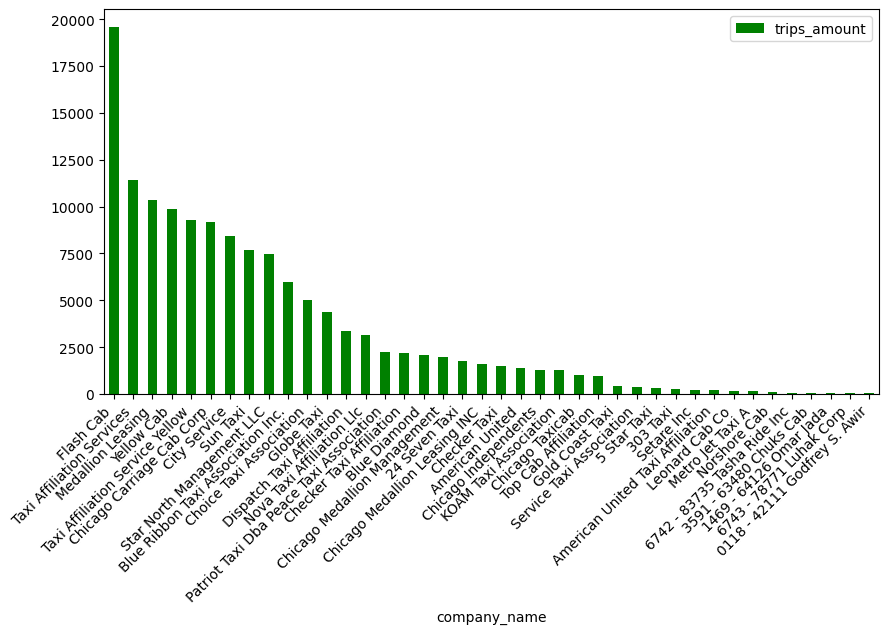

In [11]:
# Plot with company_name and trips_amount

#Top 40 companies for clear graph 
top_companies = df.sort_values(by='trips_amount', ascending=False).head(40)  

top_companies.plot(x='company_name',
                   y='trips_amount',
                   kind='bar',
                   color='green',
                   figsize=(10, 5))

plt.xticks(rotation=45, ha='right')
plt.show()


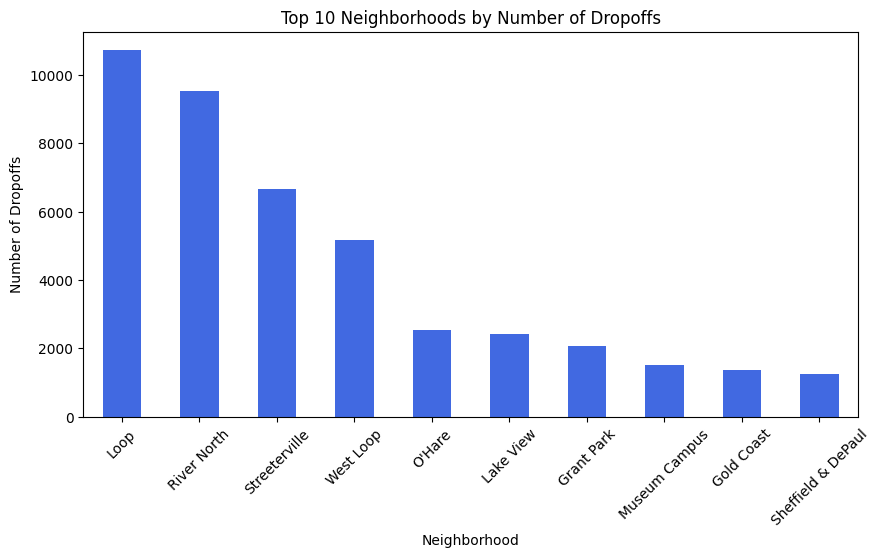

In [12]:

# Plot
top_10_neighborhoods.plot(kind='bar', figsize=(10, 5), color='royalblue')

# Formatting
plt.title('Top 10 Neighborhoods by Number of Dropoffs')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Dropoffs')
plt.xticks(rotation=45)  

plt.show()

**These graphs show data about taxi trips in a city.**

**First Graph (Companies and Trips)**

Some taxi companies complete many trips, while most do only a few.
"Flash Cab" is the busiest company, with the highest number of trips.
The number of trips drops quickly after the top few companies, meaning a small number of companies handle most of the rides.
**Second Graph (Neighborhood Dropoffs)**

The most popular drop-off locations are Loop and River North, meaning many people go there by taxi.
Other busy areas include Streeterville, West Loop, and O’Hare.
Some neighborhoods, like Sheffield & DePaul and Gold Coast, have fewer drop-offs.
**Conclusion:**
A few taxi companies dominate the market, handling most trips. Also, central areas like Loop and River North are the most common destinations for taxis, showing they are key business and activity hubs.

**Hypothesis Testing for Ride Duration**
**Hypotheses:**

**Null Hypothesis (H₀):** Ride duration on rainy Saturdays is the same as non-rainy Saturdays (μ_rainy = μ_non_rainy).
**Alternative Hypothesis (H₁):** Ride duration on rainy Saturdays is different from non-rainy Saturdays (μ_rainy ≠ μ_non_rainy).
**Significance Level (α): 0.05**

**Test Used:** Independent two-sample t-test (since we compare two separate groups).

**Steps:**

**Prepare Data:**
Select only Saturday rides.
Split into rainy (Bad weather) and non-rainy groups.
**Run t-test:**
Use ttest_ind() from scipy.stats to check if the means are different.


In [13]:


# Convert 'start_ts' to datetime and extract the day of the week
df3['start_ts'] = pd.to_datetime(df3['start_ts'])
df3['day_of_week'] = df3['start_ts'].dt.dayofweek
df3['is_saturday'] = df3['day_of_week'] == 5  

# Filter Saturday rides
saturday_rides = df3[df3['is_saturday']]
rainy_saturday_rides = saturday_rides[saturday_rides['weather_conditions'] == 'Bad']
non_rainy_saturday_rides = saturday_rides[saturday_rides['weather_conditions'] != 'Bad']

# Perform T-test
t_stat, p_value = stats.ttest_ind(rainy_saturday_rides['duration_seconds'], non_rainy_saturday_rides['duration_seconds'])

# Print Results
alpha = 0.05  # Significance level
print(f"T-Test Results: t-statistic = {t_stat}, p-value = {p_value}")

# Conclusion
if p_value < alpha:
    print("Reject the null hypothesis: Ride duration is different on rainy Saturdays.")
else:
    print("Fail to reject the null hypothesis: No significant difference in ride duration.")


T-Test Results: t-statistic = 6.946177714041499, p-value = 6.517970327099473e-12
Reject the null hypothesis: Ride duration is different on rainy Saturdays.


**Conclusion**
Since the p-value (≈ 6.52e-12) is much smaller than the significance level (0.05), we reject the null hypothesis. This means there is strong evidence that ride duration on rainy Saturdays is significantly different from non-rainy Saturdays. Rainy weather likely impacts travel time.

**Project Conclusion**
This project looked at Chicago taxi data to find the busiest taxi companies, top drop-off areas, and how weather affects ride times.

We found that a few companies handle most taxi rides, with "Flash Cab" being the busiest. The most popular drop-off spots were the Loop, River North, and O’Hare, showing these areas have a lot of activity.

We also tested if rainy weather changes ride times. The results showed that taxi rides on rainy Saturdays take longer than on dry Saturdays. This means bad weather likely causes delays.

These findings can help taxi companies plan better and give passengers a clearer idea of travel times in different weather.